# Statistical analysis of the 2024 Copa America soccer tournament

## Brief overview

I will write this after project is complete...

In [114]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
match_data = pd.read_csv("international-copa-america-matches-2024-to-2024-stats.csv")
team_data = pd.read_csv("international-copa-america-teams-2024-to-2024-stats.csv")

## Step 1: Data Cleaning and Formatting

In order to create meaningful visualizations and models for our data, we need to clean and format the raw csv data to suit our data analysis process. To begin, I filtered the data include only attributes that are complete, consistent, and relevant to the results of the group stage matches. Then, I formatted the data to improve its readability and usability.

For this study I will use to two tables. One table to hold two rows for every match played where each row represents the single match statistics for either the home or away team. The second table is the aggregate mean of the individual game statistics from first table. In this table, each row represents a single team's average statistics among their three group stage matches.

In [109]:
# Select only group stage matches and rename expected goals columns for consistency
group_stage_matches = match_data.dropna(subset=['Game Week']).rename(columns={'team_a_xg':'home_team_xg', 'team_b_xg':'away_team_xg'})

# Filter only the relevant attributes for the home and away teams
home_relevant_columns = ['home_team_name', 'away_team_name', 'Game Week', 'home_team_goal_count', 'away_team_goal_count', 'home_team_corner_count', 'home_team_yellow_cards', 'home_team_red_cards', 'home_team_shots', 'home_team_shots_on_target', 'home_team_fouls', 'home_team_possession', 'home_team_xg']
home_team_group_stage_data = group_stage_matches[home_relevant_columns]
away_relevant_columns = [col.replace('home', 'away') if col.find('home') != -1 else col.replace('away', 'home') for col in home_relevant_columns]
away_team_group_stage_data = group_stage_matches[away_relevant_columns]

# Combine the home team dataframe and away team dataframe to represent each team's stats in every group stage match
new_column_names = ['Team', 'Opponent', 'Game Week', 'Goals', 'Goals_Against', 'Corners', 'Yellow_Cards', 'Red_Cards', 'Shots', 'Shots_On_Target', 'Fouls', 'Possession', 'Expected_Goals']
home_team_group_stage_data.columns = new_column_names
away_team_group_stage_data.columns = new_column_names
team_group_stage_match_data = pd.concat([home_team_group_stage_data, away_team_group_stage_data], ignore_index=True)
team_group_stage_match_data = team_group_stage_match_data.sort_values(by=['Team'], ignore_index=True)

# Group each team's stats to calculate their averages for each relevant attribute
team_group_stage_data = team_group_stage_match_data.drop(columns=['Opponent', 'Game Week']).groupby('Team', as_index=False).mean()
team_group_stage_data = team_group_stage_data.drop(columns=['Goals_Against'])
team_group_stage_data.columns = [new_column_names[0], 'Avg_' + new_column_names[3]] + ['Avg_' + col for col in new_column_names[5:]]

# Group each team's opponent's stats to calculate their oppponent's averages for each relevant attribute
opponent_group_stage_data = team_group_stage_match_data.drop(columns=['Team', 'Game Week']).groupby('Opponent', as_index=False).mean()
new_opponent_column_names = [new_column_names[0]] + [col + '_Against' for col in new_column_names[3:]]
opponent_group_stage_data.columns = new_opponent_column_names
opponent_group_stage_data = opponent_group_stage_data.drop(columns=['Goals_Against_Against'])
opponent_group_stage_data.columns = [new_opponent_column_names[0], 'Avg_' + new_opponent_column_names[1]] + ['Avg_' + col for col in new_opponent_column_names[3:]]

# Join each team's stat averages and opponent stat averages
group_stage_data = pd.merge(team_group_stage_data, opponent_group_stage_data, on='Team')

# Add each team's group stage results to their group stage match average stats
group_stage_points = [9, 0, 5, 4, 2, 7, 4, 4, 0, 4, 6, 0, 1, 3, 9, 9]
through_to_tourney = [True, False, True, True, False, True, False, True, False, False, True, False, False, False, True, True]
team_group_stage_data = team_group_stage_data.assign(Group_Stage_Points=group_stage_points).assign(In_Tournament=through_to_tourney)
opponent_group_stage_data = opponent_group_stage_data.assign(Group_Stage_Points=group_stage_points).assign(In_Tournament=through_to_tourney)
group_stage_data = group_stage_data.assign(Group_Stage_Points=group_stage_points).assign(In_Tournament=through_to_tourney)

# Results
print('Single match data for each team\'s three group stage matches:')
display(team_group_stage_match_data.head())
print('Stat averages for each team\'s three group stage matches:')
display(group_stage_data.head())

Single match data for each team's three group stage matches:


,Team,Opponent,Game Week,Goals,Goals_Against,Corners,Yellow_Cards,Red_Cards,Shots,Shots_On_Target,Fouls,Possession,Expected_Goals
0,Argentina,Canada,1.0,2,0,7,2,0,17,10,15,64,2.34
1,Argentina,Peru,3.0,2,0,6,1,0,11,7,12,74,1.33
2,Argentina,Chile,2.0,1,0,11,0,0,17,10,9,61,2.05
3,Bolivia,USMNT,1.0,0,2,1,4,0,6,4,17,39,0.84
4,Bolivia,Panama,3.0,1,3,2,2,0,7,5,17,51,1.03


Stat averages for each team's three group stage matches:


,Team,Avg_Goals,Avg_Corners,Avg_Yellow_Cards,Avg_Red_Cards,Avg_Shots,Avg_Shots_On_Target,Avg_Fouls,Avg_Possession,Avg_Expected_Goals,...,Avg_Corners_Against,Avg_Yellow_Cards_Against,Avg_Red_Cards_Against,Avg_Shots_Against,Avg_Shots_On_Target_Against,Avg_Fouls_Against,Avg_Possession_Against,Avg_Expected_Goals_Against,Group_Stage_Points,In_Tournament
0,Argentina,1.666667,8.000000,1.000000,0.000000,15.000000,9.000000,12.000000,66.333333,1.906667,...,2.333333,3.000000,0.000000,5.666667,3.000000,13.666667,33.666667,0.830000,9,True
1,Bolivia,0.333333,2.000000,2.333333,0.000000,5.666667,3.666667,16.000000,43.666667,0.800000,...,4.000000,0.666667,0.000000,13.666667,8.666667,9.333333,56.333333,1.960000,0,False
2,Brazil,1.666667,7.000000,2.333333,0.000000,12.333333,5.000000,13.333333,60.000000,1.540000,...,3.333333,2.000000,0.333333,9.000000,4.666667,13.666667,40.000000,1.123333,5,True
3,Canada,0.333333,4.333333,2.333333,0.000000,7.000000,3.333333,13.000000,48.333333,1.026667,...,4.333333,1.333333,0.666667,10.666667,6.666667,13.333333,51.666667,1.580000,4,True
4,Chile,0.000000,2.333333,2.333333,0.333333,6.333333,3.666667,13.000000,49.000000,0.956667,...,6.666667,1.666667,0.000000,10.333333,6.333333,14.333333,51.000000,1.413333,2,False


## Step 2: Data Visualization



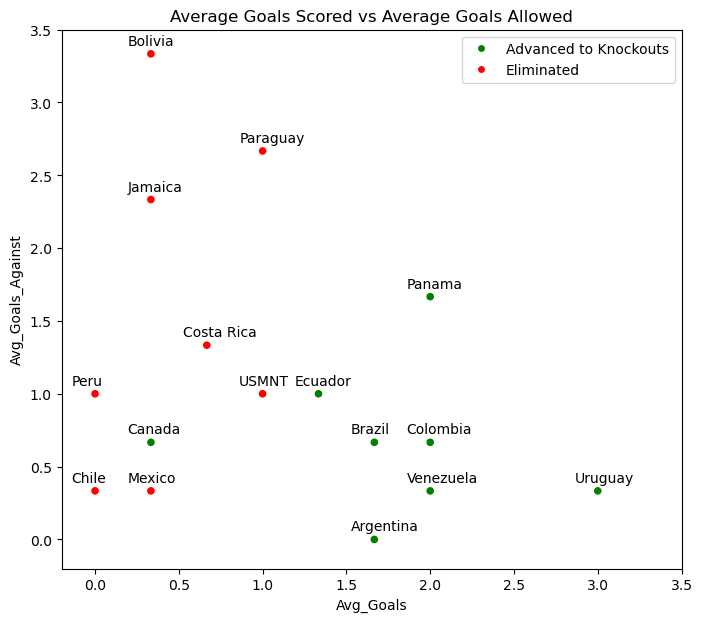

In [110]:
# Plot to see correlation between avg goals and avg goals allowed
cmap = ['green' if in_tournament else 'red' for in_tournament in group_stage_data['In_Tournament']]
group_stage_data.plot(figsize=(8, 7), kind='scatter', x='Avg_Goals', y='Avg_Goals_Against', c=cmap)
for i, team in enumerate(group_stage_data['Team']): 
    plt.annotate(team, (group_stage_data['Avg_Goals'][i] - 0.14, group_stage_data['Avg_Goals_Against'][i] + 0.06))
legend = [Line2D([0], [0], marker='o', color='w', label='Advanced to Knockouts', markerfacecolor='g'),
          Line2D([0], [0], marker='o', color='w', label='Eliminated', markerfacecolor='r')]
plt.subplot().legend(handles=legend)
plt.title("Average Goals Scored vs Average Goals Allowed")
plt.xlim((-0.2,3.5))
plt.ylim((-0.2,3.5))
plt.show()

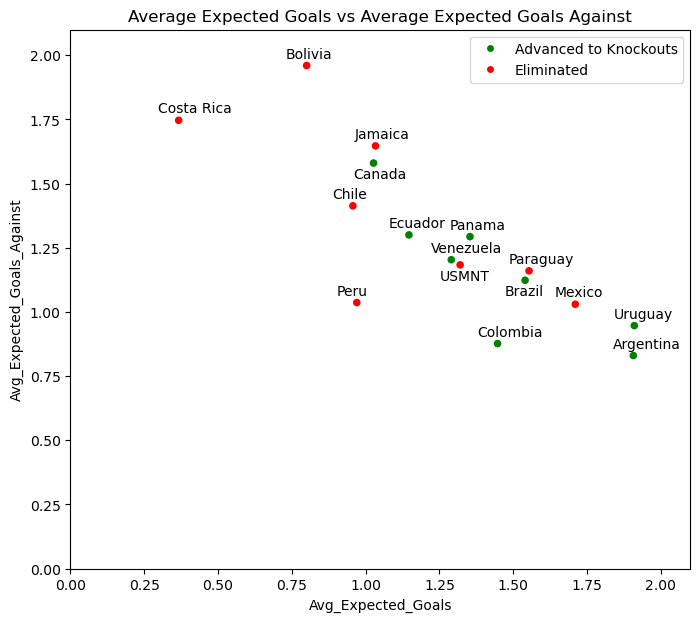

In [113]:
# Plot to see correlation between average expected goals and average expected goals against
group_stage_data.plot(figsize=(8, 7), kind='scatter', x='Avg_Expected_Goals', y='Avg_Expected_Goals_Against', c=cmap)
for i, team in enumerate(group_stage_data['Team']): 
    if team == 'USMNT' or team == 'Brazil' or team == 'Canada':
        plt.annotate(team, (group_stage_data['Avg_Expected_Goals'][i] - 0.07, group_stage_data['Avg_Expected_Goals_Against'][i] - 0.06))
    else:
        plt.annotate(team, (group_stage_data['Avg_Expected_Goals'][i] - 0.07, group_stage_data['Avg_Expected_Goals_Against'][i] + 0.03))
plt.subplot().legend(handles=legend)
plt.ylim((0,2.1))
plt.xlim((0,2.1))
plt.title("Average Expected Goals vs Average Expected Goals Against")
plt.show()

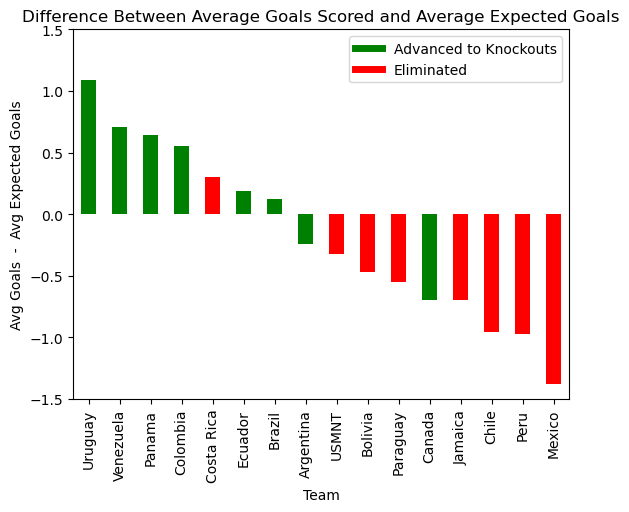

In [136]:
#
expected_goals_difference = np.subtract(group_stage_data['Avg_Goals'], group_stage_data['Avg_Expected_Goals'])
group_stage_data = group_stage_data.assign(Avg_Expected_Goal_Differential=expected_goals_difference)
color_data = pd.DataFrame(data={'difference': expected_goals_difference, 'color': cmap})
color_data = color_data.sort_values('difference', ascending=False)
group_stage_data.sort_values('Avg_Expected_Goal_Differential', ascending=False).plot.bar('Team', 'Avg_Expected_Goal_Differential', color=color_data['color'])
bar_legend = [Line2D([0], [0], color='g', label='Advanced to Knockouts', linewidth=5),
          Line2D([0], [0], color='r', label='Eliminated', linewidth=5)]
plt.subplot().legend(handles=bar_legend)
plt.ylabel('Avg Goals  -  Avg Expected Goals')
plt.ylim((-1.5,1.5))
plt.title("Difference Between Average Goals Scored and Average Expected Goals")
plt.show()
